In [ ]:
!pip install patool

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.5/77.5 kB 2.9 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import random
import numpy as np
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
import sklearn as skl
import scipy as sp
import plotly.graph_objects as go
import graphviz
import statsmodels.api as sm
import statsmodels.formula.api as smf
import torch
import torch.nn as nn
import sklearn as skl
import torchvision 
import torchvision.transforms as transforms
import zipfile
import gzip
import torch.optim as optim
import torch.nn.functional as F
import matplotlib
import os
import patoolib
import copy
import albumentations as A
import torch.optim as optim
import cv2
import plotly.express as px
import sklearn
try:
  import transformers # Huggingface’s transformers library
except:
  !pip install transformers
  import transformers

from collections import Counter
from albumentations.pytorch import ToTensorV2
from skimage.transform import resize
from skimage.io import imread
from pandas.core.common import random_state
from sklearn.utils import resample
from sklearn.datasets import make_classification
from torch.utils.data import Dataset, DataLoader
from tqdm import tqdm
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from transformers import AutoModel, AutoTokenizer , BertTokenizerFast
from transformers import AdamW
from sklearn.cluster import KMeans
from scipy.spatial import distance
from sklearn.svm import SVC
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (25.0, 7.0)

# **Лабораторная 1 - анализ ЭКГ пациентов**

In [ ]:
df_mit = pd.read_csv('/content/mitbih_test.csv', header=None)
#df_ptb = pd.read_csv('/content/ptbdb_normal[1].csv')

In [ ]:
df_mit

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,1.000000,0.758264,0.111570,0.000000,0.080579,0.078512,0.066116,0.049587,0.047521,0.035124,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.908425,0.783883,0.531136,0.362637,0.366300,0.344322,0.333333,0.307692,0.296703,0.300366,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.730088,0.212389,0.000000,0.119469,0.101770,0.101770,0.110619,0.123894,0.115044,0.132743,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.910417,0.681250,0.472917,0.229167,0.068750,0.000000,0.004167,0.014583,0.054167,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.570470,0.399329,0.238255,0.147651,0.000000,0.003356,0.040268,0.080537,0.070470,0.090604,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21887,0.928736,0.871264,0.804598,0.742529,0.650575,0.535632,0.394253,0.250575,0.140230,0.102299,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
21888,0.802691,0.692078,0.587444,0.446936,0.318386,0.189836,0.118087,0.077728,0.112108,0.152466,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
21889,1.000000,0.967359,0.620178,0.347181,0.139466,0.089021,0.103858,0.100890,0.106825,0.100890,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
21890,0.984127,0.567460,0.607143,0.583333,0.607143,0.575397,0.575397,0.488095,0.392857,0.238095,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0


In [ ]:
#df_ptb

In [ ]:
print(df_mit.isnull().sum())

0      0
1      0
2      0
3      0
4      0
      ..
183    0
184    0
185    0
186    0
187    0
Length: 188, dtype: int64


In [ ]:
df_mit = df_mit.dropna()

In [ ]:
print(df_mit.isnull().sum())

0      0
1      0
2      0
3      0
4      0
      ..
183    0
184    0
185    0
186    0
187    0
Length: 188, dtype: int64


In [ ]:
classes = df_mit.iloc[:,-1].unique()
print(classes)

[0. 1. 2. 3. 4.]


In [ ]:
df_mit.iloc[:,-1] = df_mit.iloc[:,-1].astype(int)
obj_by_class = df_mit.iloc[:,-1].value_counts()
print(obj_by_class)

0    18118
4     1608
2     1448
1      556
3      162
Name: 187, dtype: int64


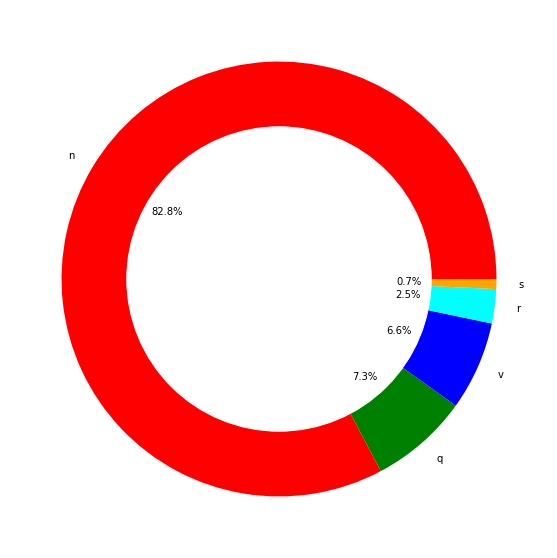

In [ ]:
plt.figure(figsize=(20,10))
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(obj_by_class, labels=['n','q','v','r','s'], colors=['red','green','blue','aqua','orange'],autopct = '%1.1f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [ ]:
c = df_mit.groupby(187,group_keys=False).apply(lambda df_mit : df_mit.sample(1))

In [ ]:
c

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
16616,1.000000,0.557471,0.433908,0.258621,0.169540,0.097701,0.077586,0.071839,0.068966,0.060345,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
18494,1.000000,0.944162,0.269036,0.000000,0.101523,0.162437,0.131980,0.192893,0.263959,0.218274,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
19662,0.920000,0.812727,0.538182,0.080000,0.000000,0.080000,0.080000,0.121818,0.165455,0.229091,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
20201,0.946903,1.000000,0.660177,0.350442,0.187611,0.150442,0.120354,0.113274,0.097345,0.088496,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
21352,0.742424,0.672727,0.577273,0.469697,0.342424,0.203030,0.098485,0.031818,0.000000,0.009091,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4


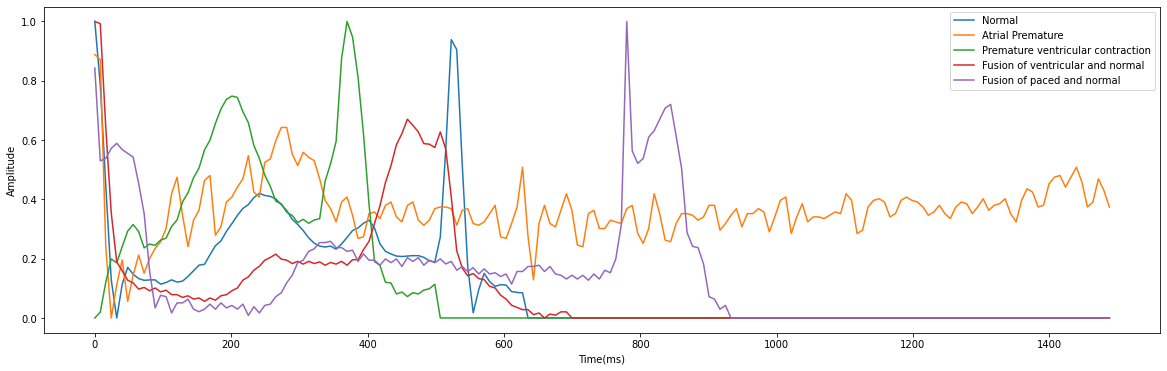

In [ ]:
C0 = c.iloc[0,:186].values
C1 = c.iloc[1,:186].values
C2 = c.iloc[2,:186].values
C3 = c.iloc[3,:186].values
C4 = c.iloc[4,:186].values

plt.figure(figsize=(20,6))
plt.plot(x, C0, label="Normal")
plt.plot(x, C1, label="Atrial Premature")
plt.plot(x, C2, label="Premature ventricular contraction")
plt.plot(x, C3, label="Fusion of ventricular and normal")
plt.plot(x, C4, label="Fusion of paced and normal")
plt.xlabel('Time(ms)')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

In [ ]:
x = np.linspace(0, 186*0.008*1000, num = 186)


In [ ]:

df_1=df_mit[df_mit[187]==1]
df_2=df_mit[df_mit[187]==2]
df_3=df_mit[df_mit[187]==3]
df_4=df_mit[df_mit[187]==4]
df_0=(df_mit[df_mit[187]==0]).sample(n=641,random_state=42)

df_1_upsample=resample(df_1,replace=True,n_samples=641,random_state=123)
df_2_upsample=resample(df_2,replace=True,n_samples=641,random_state=124)
df_3_upsample=resample(df_3,replace=True,n_samples=641,random_state=125)
df_4_upsample=resample(df_4,replace=True,n_samples=641,random_state=126)

df_mit=pd.concat([df_0, df_1_upsample,df_2_upsample,df_3_upsample,df_4_upsample])


In [ ]:
obj_by_class = df_mit[187].value_counts()
print(obj_by_class)

0    641
1    641
2    641
3    641
4    641
Name: 187, dtype: int64


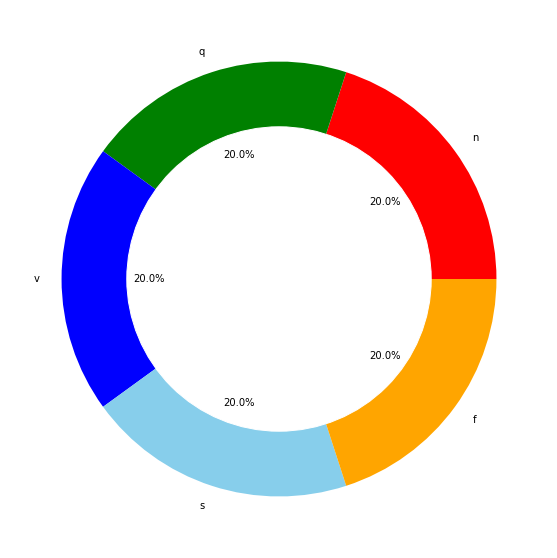

In [ ]:
plt.figure(figsize=(20,10)) 
my_circle=plt.Circle( (0,0), 0.7, color='white') 
plt.pie(obj_by_class, labels=['n', 'q', 'v', 's', 'f'], colors=['red', 'green', 'blue', 'skyblue', 'orange'], autopct = '%1.1f%%') 
p=plt.gcf() 
p.gca().add_artist(my_circle) 
plt.show()

# **Лабораторная 2 классификация эиоций лиц с использование НС**

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
with zipfile.ZipFile('/content/drive/MyDrive/Facial_2.zip', 'r') as zip_ref:
  zip_ref.extractall('/content/dataset')

In [ ]:
#функция для вывода изображений
def image_shower(images, labels, n=6):
    plt.figure(figsize=(12, 12))
    for i, image in enumerate(images[:n]):
        plt.subplot(n, n, i + 1)
        image = image/ 2 + 0.5
        plt.imshow(image.numpy().transpose((1, 2, 0)).squeeze())
    print("Real Labels: ", ' '.join('%5s' % classes[label] for label in labels[:n]))
#имена классов
classes = ("angry", "fear","happy","neutral","sad",'suprise')

#путь до датасета
PATH = "/content/dataset"

In [ ]:
# зададим какие преобразования необходимо сделать с каждым изображением
transform = transforms.Compose(
    [transforms.Resize((82,82)),  #изменим размер изображений
     transforms.ToTensor(),   #переведем в формат который необходим нейронной сети - тензор
     transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])]) # проведем нормализацию изображения

#загружаем тренировочный и тестовый датасеты
trainset = torchvision.datasets.ImageFolder(os.path.join(PATH, "train"), transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=8, num_workers=0, shuffle=True) #DataLoader будет загружать наше изображение по батчам

testset = torchvision.datasets.ImageFolder(os.path.join(PATH, "test"), transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=8, num_workers=0, shuffle=True)

Real Labels:  happy   sad suprise happy neutral suprise


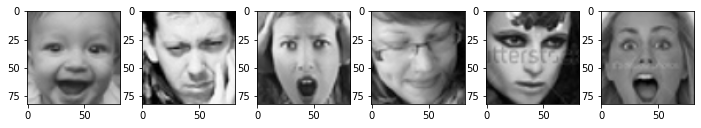

In [ ]:
#Проверим как работает наш загрузчик и посмотрим на парочку изображений
images, labels = next(iter(trainloader))
image_shower(images, labels)

In [ ]:
# Инициализация модели
class Model_4(nn.Module):
    def __init__(self):
        super().__init__()

        self.conv0_1 = nn.Conv2d(3,64,3)
        self.conv0_2 = nn.Conv2d(64,64,3)
        self.conv0_3 = nn.Conv2d(64,128,3)
        self.bn0=nn.BatchNorm2d(num_features=128)
        self.gn0 = nn.GroupNorm(8, 128)
        #GroupNorm

        self.conv1_1 = nn.Conv2d(128,128,3)
        self.conv1_2 = nn.Conv2d(128,128,3)
        self.conv1_3 = nn.Conv2d(128,512,3)
        self.bn1=nn.BatchNorm2d(num_features=512)

        self.conv2_1 = nn.Conv2d(512,512,3)
        self.conv2_2 = nn.Conv2d(512,512,3)
        self.conv2_3 = nn.Conv2d(512,512,3)
        self.bn2=nn.BatchNorm2d(num_features=512)

        self.conv3_1 = nn.Conv2d(512,512,3)
        self.conv3_2 = nn.Conv2d(512,512,3)
        self.conv3_3 = nn.Conv2d(512,512,3)
        self.bn3=nn.BatchNorm2d(num_features=512)

        self.conv4_1 = nn.Conv2d(512,512,3)
        self.conv4_2 = nn.Conv2d(512,512,3)
        self.conv4_3 = nn.Conv2d(512,512,2)
        self.bn4=nn.BatchNorm2d(num_features=512)

        self.pool = nn.MaxPool2d(2,2)
        self.act = nn.Tanh()
        self.flatten = nn.Flatten()#Сглаживает input путем преобразования его в одномерный тензор. 
        self.linear0 = nn.Linear(512, 64)
        self.linear1 = nn.Linear(64,7)

    def forward(self, x):

        x = self.conv0_1(x)
        x = self.conv0_2(x)
        x = self.conv0_3(x)
        x = self.gn0(x)
        #x = self.act(x)

        x = self.pool(x)

        x = self.conv1_1(x)
        x = self.conv1_2(x)
        x = self.conv1_3(x)
        #x = self.bn1(x)

        x = self.pool(x)

        x = self.conv2_1(x)
        x = self.conv2_2(x)
        x = self.conv2_3(x)
        #x = self.bn2(x)

        x = self.pool(x)

        x = self.conv3_1(x)
        x = self.conv3_2(x)
        x = self.conv3_3(x)
        #x = self.bn3(x)

        x = self.pool(x)

        x = self.conv4_1(x)
        x = self.conv4_2(x)
        x = self.conv4_3(x)

        x = self.flatten(x)
        x = self.linear0(x)
        x = self.act(x)
        x = self.linear1(x)


        

        return x

model4 = Model_4()

In [ ]:
# Инициализация модели
class Model_4(nn.Module):
    def __init__(self, nc):
        super().__init__()

        self.actT = nn.Tanh()
        self.act = nn.GELU()
        self.gn0_1 = nn.GroupNorm(2, nc)
        self.gn0_2 = nn.GroupNorm(2, nc)
        self.gn0_3 = nn.GroupNorm(2, nc)
        self.gn0_4 = nn.GroupNorm(2, nc)

        self.gn1_1 = nn.GroupNorm(2, 2*nc)
        self.gn1_2 = nn.GroupNorm(2, 2*nc)
        self.gn1_3 = nn.GroupNorm(2, 2*nc)
        self.gn1_4 = nn.GroupNorm(2, 2*nc)
        self.gn1_5 = nn.GroupNorm(2, 2*nc)
        self.gn1_6 = nn.GroupNorm(2, 2*nc)
        self.gn1_7 = nn.GroupNorm(2, 2*nc)

        self.gn2_1 = nn.GroupNorm(2, nc)
        self.gn2_2 = nn.GroupNorm(2, nc)
        self.gn2_3 = nn.GroupNorm(2, nc)
        self.gn2_4 = nn.GroupNorm(2, nc)        


        self.conv0_1 = nn.Conv2d(3, nc, 7)
        self.conv0_2 = nn.Conv2d(nc, nc, 3)
        self.conv0_3 = nn.Conv2d(nc, nc, 3)
        self.conv0_4 = nn.Conv2d(nc, nc, 3)

        self.conv1_1 = nn.Conv2d(nc, 2*nc, 3)
        self.conv1_2 = nn.Conv2d(2*nc, 2*nc, 3)
        self.conv1_3 = nn.Conv2d(2*nc, 2*nc, 3)
        self.conv1_4 = nn.Conv2d(2*nc, 2*nc, 3)
        self.conv1_5 = nn.Conv2d(2*nc, 2*nc, 3)
        self.conv1_6 = nn.Conv2d(2*nc, 2*nc, 3)
        self.conv1_7 = nn.Conv2d(2*nc, 2*nc, 3)


        self.conv2_1 = nn.Conv2d(3*nc, nc, 3)
        self.conv2_2 = nn.Conv2d(nc, nc, 3)
        self.conv2_3 = nn.Conv2d(nc, nc, 3)
        self.conv2_4 = nn.Conv2d(nc, 2, 3)

        self.flatten = nn.Flatten()
        self.linear0 = nn.Linear(7688,42)
        self.linear1 = nn.Linear(42,7)

    def forward(self, x):

        fea = self.conv0_1(x)
        fea = self.gn0_1(fea)
        fea = self.act(fea)
        fea = self.conv0_2(fea)
        fea = self.gn0_2(fea)
        fea = self.act(fea)
        fea = self.conv0_3(fea)
        fea = self.gn0_3(fea)
        fea = self.act(fea)
        fea = self.conv0_4(fea)
        fea = self.gn0_4(fea)
        fea = self.act(fea)        
        

        _,_,h,w = fea.shape

        fea_deep = self.conv1_1(fea)
        fea_deep = self.gn1_1(fea_deep)
        fea_deep = self.act(fea_deep)
        fea_deep = self.conv1_2(fea_deep)
        fea_deep = self.gn1_2(fea_deep)
        fea_deep = self.act(fea_deep)
        fea_deep = self.conv1_3(fea_deep)
        fea_deep = self.gn1_3(fea_deep)
        fea_deep = self.act(fea_deep)
        fea_deep = self.conv1_4(fea_deep)
        fea_deep = self.gn1_4(fea_deep)
        fea_deep = self.act(fea_deep)
        
        fea_deep = F.upsample(fea_deep, size = (h,w), mode = 'bilinear')

        fea = torch.cat((fea, fea_deep), axis = 1)
        del fea_deep
        fea = self.conv2_1(fea)
        fea = self.gn2_1(fea)
        fea = self.act(fea)
        fea = self.conv2_2(fea)
        fea = self.gn2_2(fea)
        fea = self.act(fea)
        fea = self.conv2_3(fea)
        fea = self.gn2_3(fea)
        fea = self.act(fea)
        fea = self.conv2_4(fea)        
        
        fea = self.flatten(fea)
        fea = self.linear0(fea)
        fea = self.actT(fea)
        fea = self.linear1(fea)

        return fea

model4 = Model_4(256)

In [ ]:
# Инициализация модели
class Model_4(nn.Module):
    def __init__(self, nc):
        super().__init__()

        self.actT = nn.Tanh()
        self.act = nn.GELU()
        self.pool = nn.MaxPool2d(2,2)

        self.gn0_1 = nn.GroupNorm(2, nc)
        self.gn0_2 = nn.GroupNorm(2, nc)
        self.gn0_3 = nn.GroupNorm(2, nc)
        self.gn0_4 = nn.GroupNorm(2, nc)

        self.gn1_1 = nn.GroupNorm(2, 2*nc)
        self.gn1_2 = nn.GroupNorm(2, 2*nc)
        self.gn1_3 = nn.GroupNorm(2, 2*nc)
        self.gn1_4 = nn.GroupNorm(2, 2*nc)

        self.gn3_1 = nn.GroupNorm(2, 2*nc)
        self.gn3_2 = nn.GroupNorm(2, 2*nc)
        self.gn3_3 = nn.GroupNorm(2, 2*nc)
        self.gn3_4 = nn.GroupNorm(2, 2*nc)

        self.gn4_1 = nn.GroupNorm(2, 2*nc)
        self.gn4_2 = nn.GroupNorm(2, 2*nc)
        self.gn4_3 = nn.GroupNorm(2, 2*nc)
        self.gn4_4 = nn.GroupNorm(2, 2*nc)       

        self.gn5_1 = nn.GroupNorm(2, 2*nc)
        self.gn5_2 = nn.GroupNorm(2, 2*nc)
        self.gn5_3 = nn.GroupNorm(2, 2*nc)
        self.gn5_4 = nn.GroupNorm(2, 2*nc)

        self.gn6_1 = nn.GroupNorm(2, 2*nc)
        self.gn6_2 = nn.GroupNorm(2, 2*nc)
        self.gn6_3 = nn.GroupNorm(2, 2*nc)
        self.gn6_4 = nn.GroupNorm(2, 2*nc)        


        self.gn2_1 = nn.GroupNorm(2, nc)
        self.gn2_2 = nn.GroupNorm(2, nc)
        self.gn2_3 = nn.GroupNorm(2, nc)
        self.gn2_4 = nn.GroupNorm(2, nc)        


        self.conv0_1 = nn.Conv2d(3, nc, 7)
        self.conv0_2 = nn.Conv2d(nc, nc, 3)
        self.conv0_3 = nn.Conv2d(nc, nc, 3)
        self.conv0_4 = nn.Conv2d(nc, nc, 3)

        self.conv1_1 = nn.Conv2d(nc, 2*nc, 3)
        self.conv1_2 = nn.Conv2d(2*nc, 2*nc, 3)
        self.conv1_3 = nn.Conv2d(2*nc, 2*nc, 3)
        self.conv1_4 = nn.Conv2d(2*nc, 2*nc, 3)


        self.conv3_1 = nn.Conv2d(2*nc, 2*nc, 3)
        self.conv3_2 = nn.Conv2d(2*nc, 2*nc, 3)
        self.conv3_3 = nn.Conv2d(2*nc, 2*nc, 3)
        self.conv3_4 = nn.Conv2d(2*nc, 2*nc, 3)

        self.conv4_1 = nn.Conv2d(4*nc, 2*nc, 3)
        self.conv4_2 = nn.Conv2d(2*nc, 2*nc, 3)
        self.conv4_3 = nn.Conv2d(2*nc, 2*nc, 3)
        self.conv4_4 = nn.Conv2d(2*nc, 2*nc, 3)  
        
        self.conv5_1 = nn.Conv2d(2*nc, 2*nc, 3)
        self.conv5_2 = nn.Conv2d(2*nc, 2*nc, 3)
        self.conv5_3 = nn.Conv2d(2*nc, 2*nc, 3)
        self.conv5_4 = nn.Conv2d(2*nc, 2*nc, 3) 

        self.conv6_1 = nn.Conv2d(4*nc, 2*nc, 3)
        self.conv6_2 = nn.Conv2d(2*nc, 2*nc, 3)
        self.conv6_3 = nn.Conv2d(2*nc, 2*nc, 3)
        self.conv6_4 = nn.Conv2d(2*nc, 2*nc, 3)         

        self.conv2_1 = nn.Conv2d(3*nc, nc, 3)
        self.conv2_2 = nn.Conv2d(nc, nc, 3)
        self.conv2_3 = nn.Conv2d(nc, nc, 3)
        self.conv2_4 = nn.Conv2d(nc, 2, 3)

        self.flatten = nn.Flatten()
        self.linear0 = nn.Linear(7688,42)
        self.linear1 = nn.Linear(42,6)

    def forward(self, x):
        ######################################## 111111111111111111111111111
        fea = self.conv0_1(x)
        fea = self.gn0_1(fea)
        fea = self.act(fea)
        fea = self.conv0_2(fea)
        fea = self.gn0_2(fea)
        fea = self.act(fea)
        fea = self.conv0_3(fea)
        fea = self.gn0_3(fea)
        fea = self.act(fea)
        fea = self.conv0_4(fea)
        fea = self.gn0_4(fea)
        fea = self.act(fea)        
        

        _,_,h,w = fea.shape
        ######################################## 22222222222222222222222222222222222
        fea_deep = self.conv1_1(fea)
        fea_deep = self.gn1_1(fea_deep)
        fea_deep = self.act(fea_deep)
        fea_deep = self.conv1_2(fea_deep)
        fea_deep = self.gn1_2(fea_deep)
        fea_deep = self.act(fea_deep)
        fea_deep = self.conv1_3(fea_deep)
        fea_deep = self.gn1_3(fea_deep)
        fea_deep = self.act(fea_deep)
        fea_deep = self.conv1_4(fea_deep)
        fea_deep = self.gn1_4(fea_deep)
        fea_deep = self.act(fea_deep)

        _,_,ha2,w2 = fea_deep.shape
        fea_deep_2 = self.pool(fea_deep)
        ###########################################     333333333333333333333333333333333333
        fea_deep_2 = self.conv3_1(fea_deep_2)
        fea_deep_2 = self.gn3_1(fea_deep_2)
        fea_deep_2 = self.act(fea_deep_2)
        fea_deep_2 = self.conv3_2(fea_deep_2)
        fea_deep_2 = self.gn3_2(fea_deep_2)
        fea_deep_2 = self.act(fea_deep_2)
        fea_deep_2 = self.conv3_3(fea_deep_2)
        fea_deep_2 = self.gn3_3(fea_deep_2)
        fea_deep_2 = self.act(fea_deep_2)
        fea_deep_2 = self.conv3_4(fea_deep_2)
        fea_deep_2 = self.gn3_4(fea_deep_2)
        fea_deep_2 = self.act(fea_deep_2)

        _,_,ha3,w3 = fea_deep_2.shape
        fea_deep_3 = self.pool(fea_deep_2)
        ###########################################     44444444444444444444444444444444444444444
        fea_deep_3 = self.conv5_1(fea_deep_3)
        fea_deep_3 = self.gn5_1(fea_deep_3)
        fea_deep_3 = self.act(fea_deep_3)
        fea_deep_3 = self.conv5_2(fea_deep_3)
        fea_deep_3 = self.gn5_2(fea_deep_3)
        fea_deep_3 = self.act(fea_deep_3)
        fea_deep_3 = self.conv5_3(fea_deep_3)
        fea_deep_3 = self.gn5_3(fea_deep_3)
        fea_deep_3 = self.act(fea_deep_3)
        fea_deep_3 = self.conv5_4(fea_deep_3)
        fea_deep_3 = self.gn5_4(fea_deep_3)
        fea_deep_3 = self.act(fea_deep_3)

        fea_deep_3 = F.upsample(fea_deep_3, size = (ha3,w3), mode = 'bilinear')
        fea_deep_2 = torch.cat((fea_deep_2, fea_deep_3), axis = 1)
        del fea_deep_3

        ###########################################     333333333333333333333333333333333333
        fea_deep_2 = self.conv6_1(fea_deep_2)
        fea_deep_2 = self.gn6_1(fea_deep_2)
        fea_deep_2 = self.act(fea_deep_2)
        fea_deep_2 = self.conv6_2(fea_deep_2)
        fea_deep_2 = self.gn6_2(fea_deep_2)
        fea_deep_2 = self.act(fea_deep_2)
        fea_deep_2 = self.conv6_3(fea_deep_2)
        fea_deep_2 = self.gn6_3(fea_deep_2)
        fea_deep_2 = self.act(fea_deep_2)
        fea_deep_2 = self.conv6_4(fea_deep_2)
        fea_deep_2 = self.gn6_4(fea_deep_2)
        fea_deep_2 = self.act(fea_deep_2)

        fea_deep_2 = F.upsample(fea_deep_2, size = (ha2,w2), mode = 'bilinear')
        fea_deep = torch.cat((fea_deep, fea_deep_2), axis = 1)
        del fea_deep_2
        #######################################      222222222222222222222222222222222222222
        fea_deep = self.conv4_1(fea_deep)
        fea_deep = self.gn4_1(fea_deep)
        fea_deep = self.act(fea_deep)
        fea_deep = self.conv4_2(fea_deep)
        fea_deep = self.gn4_2(fea_deep)
        fea_deep = self.act(fea_deep)
        fea_deep = self.conv4_3(fea_deep)
        fea_deep = self.gn4_3(fea_deep)
        fea_deep = self.act(fea_deep)
        fea_deep = self.conv4_4(fea_deep)
        fea_deep = self.gn4_4(fea_deep)
        fea_deep = self.act(fea_deep)

        fea_deep = F.upsample(fea_deep, size = (h,w), mode = 'bilinear')
        #########################################         1111111111111111111111111111111111111111111
        fea = torch.cat((fea, fea_deep), axis = 1)
        del fea_deep
        fea = self.conv2_1(fea)
        fea = self.gn2_1(fea)
        fea = self.act(fea)
        fea = self.conv2_2(fea)
        fea = self.gn2_2(fea)
        fea = self.act(fea)
        fea = self.conv2_3(fea)
        fea = self.gn2_3(fea)
        fea = self.act(fea)
        fea = self.conv2_4(fea)        
        
        fea = self.flatten(fea)
        fea = self.linear0(fea)
        fea = self.actT(fea)
        fea = self.linear1(fea)

        return fea

model4 = Model_4(64)

In [ ]:
#Критерии полезны для обучения нейронной сети. Учитывая входные данные и цель, они вычисляют градиент в соответствии с заданной функцией потерь
criterion = nn.CrossEntropyLoss()
#criterion = nn.L1Loss()
#torch.optim - это пакет, реализующий различные алгоритмы оптимизации. Наиболее часто используемые методы уже поддерживаются, а интерфейс достаточно общий, так что более сложные методы могут быть также легко интегрированы в будущем.
optimizer = optim.Adam(model4.parameters(), lr=0.0001)

In [ ]:
torch.cuda.is_available()

True

In [ ]:
model4 = model4.to(device)
criterion = criterion.to(device)

In [ ]:
epochs = 10
for epoch in range(epochs):  # многократное прохождение по набору данных

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # получаем входные данные; данные - это список [inputs, labels].
        inputs, labels = data
        inputs = inputs.to(device)
        labels = labels.to(device)

        # обнуляем градиенты параметров
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model4(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # вывести статистику обучения
        running_loss += loss.item() 
        if i % 200 == 0:    # вывести каждые 10 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 10:.3f}')
            running_loss = 0.0

print('Finished Training')

[1,     1] loss: 0.148
[1,   201] loss: 27.124
[1,   401] loss: 26.583
[1,   601] loss: 26.750
[1,   801] loss: 26.865
[1,  1001] loss: 26.448
[1,  1201] loss: 26.331
[1,  1401] loss: 26.947
[1,  1601] loss: 26.322
[1,  1801] loss: 26.617
[1,  2001] loss: 26.636
[1,  2201] loss: 27.150
[1,  2401] loss: 26.721
[1,  2601] loss: 26.688
[1,  2801] loss: 26.659
[1,  3001] loss: 26.617
[2,     1] loss: 0.079
[2,   201] loss: 25.384
[2,   401] loss: 25.350
[2,   601] loss: 24.479
[2,   801] loss: 25.785
[2,  1001] loss: 24.983
[2,  1201] loss: 25.620
[2,  1401] loss: 24.937
[2,  1601] loss: 25.471
[2,  1801] loss: 25.811
[2,  2001] loss: 25.499
[2,  2201] loss: 25.687
[2,  2401] loss: 25.809
[2,  2601] loss: 25.444
[2,  2801] loss: 25.670
[2,  3001] loss: 25.805
[3,     1] loss: 0.120
[3,   201] loss: 23.990
[3,   401] loss: 24.029
[3,   601] loss: 23.558
[3,   801] loss: 23.515
[3,  1001] loss: 23.492
[3,  1201] loss: 23.927
[3,  1401] loss: 24.191
[3,  1601] loss: 24.292
[3,  1801] loss: 23

In [ ]:
correct = 0
total = 0
# поскольку мы не обучаемся, нам не нужно вычислять градиенты для наших выходов
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images = images.to(device)
        labels = labels.to(device)
        # рассчитываем выходные данные, пропуская изображения через сеть
        outputs = model4(images)
        # класс с наибольшей мощностью - это то, что мы выбираем в качестве предсказания
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network test images: {100 * correct // total} %')

Accuracy of the network test images: 43 %


In [ ]:
# Подготовка
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

with torch.no_grad():
    for data in testloader:
        images, labels = data
        images = images.to(device)
        labels = labels.to(device)        
        outputs = model4(images)
        _, predictions = torch.max(outputs, 1)
        # собираем правильные прогнозы для каждого класса
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# Выводим точность на каждом классе
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: angry is 22.4 %
Accuracy for class: fear  is 15.9 %
Accuracy for class: happy is 64.9 %
Accuracy for class: neutral is 46.8 %
Accuracy for class: sad   is 53.5 %
Accuracy for class: suprise is 55.1 %


# **Лабораторная 3 - Сегментация изображений с использование НС**

In [ ]:
os.makedirs("dataset", exist_ok=True)

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
patoolib.extract_archive("/content/drive/MyDrive/PH2Dataset.rar", outdir='/content/dataset')

patool: Extracting /content/drive/MyDrive/PH2Dataset.rar ...
patool: running /usr/bin/unrar x -- /content/drive/MyDrive/PH2Dataset.rar
patool:     with cwd='/content/dataset'
patool: ... /content/drive/MyDrive/PH2Dataset.rar extracted to `/content/dataset'.


'/content/dataset'

In [ ]:
def plot_images():
  plt.figure(figsize=(18, 6))
  for i in range(6):
    plt.subplot(2, 6, i+1)
    plt.axis("off")
    plt.imshow(X[i])
    plt.subplot(2, 6, i+7)
    plt.axis("off")
    plt.imshow(Y[i])
  plt.show()

In [ ]:
images = []
lesions = []
root = '/content/dataset/PH2Dataset'
for root, dirs, files in os.walk(os.path.join(root, 'PH2 Dataset images')):
  if root.endswith('_Dermoscopic_Image'):
    images.append(imread(os.path.join(root,files[0])))
  if root.endswith('_lesion'):
    lesions.append(imread(os.path.join(root,files[0])))
size = (236, 236)
X = [resize(x, size, mode='constant',anti_aliasing=True,) for x in images]
Y = [resize(y, size, mode='constant',anti_aliasing=False) > 0.5 for y in lesions]
X = np.array(X, np.float32)
Y = np.array(Y, np.float32)
print(f'Loaded {len(X)} images')
len(lesions)
ix = np.random.choice(len(X), len(X), False)
tr, val, ts = np.split(ix, [100, 150])
print(len(tr), len(val), len(ts))

Loaded 200 images
100 50 50


In [ ]:
#tr = np.concatenate([tr, val])
#len(tr)

150

In [ ]:
batch_size = 12
# noinspection PyTypeChecker
data_tr = DataLoader(list(zip(np.rollaxis(X[tr], 3, 1),Y[tr, np.newaxis])),batch_size=batch_size,shuffle=True)

data_val = DataLoader(list(zip(np.rollaxis(X[val], 3,1), Y[val, np.newaxis])),batch_size=batch_size,shuffle=True)

# noinspection PyTypeChecker
data_ts = DataLoader(list(zip(np.rollaxis(X[ts], 3, 1),Y[ts, np.newaxis])),batch_size=batch_size,shuffle=True)

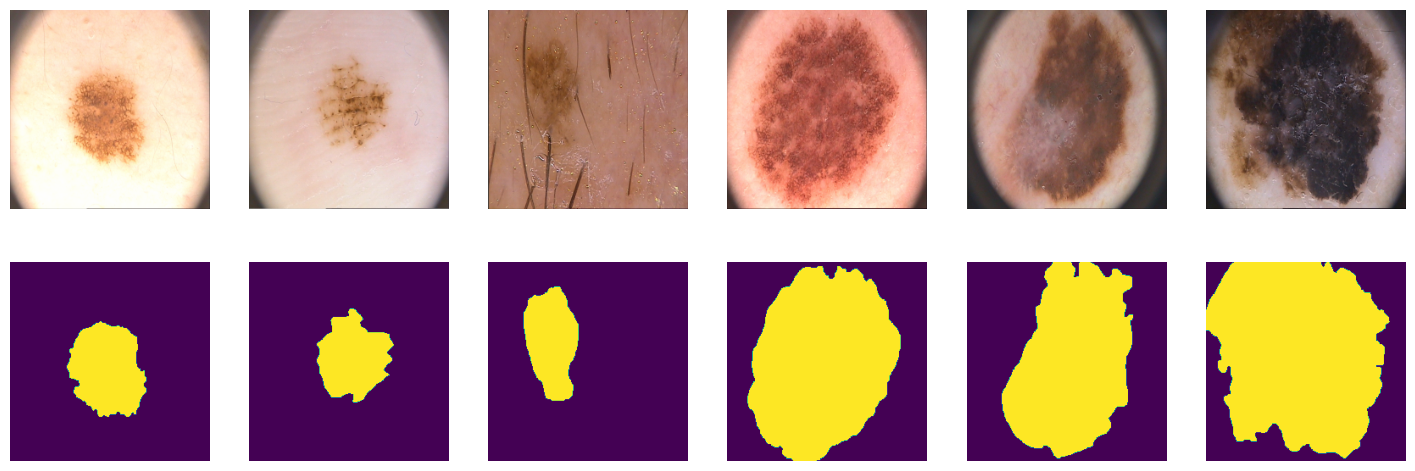

In [ ]:
#Проверим как работает наш загрузчик и посмотрим на парочку изображений
plot_images()

In [ ]:
# Инициализация модели
class Model_4(nn.Module):
    def __init__(self, nc):
        super().__init__()

        self.actT = nn.Tanh()
        self.act = nn.GELU()
        self.pool = nn.MaxPool2d(2,2)

        self.gn0_1 = nn.GroupNorm(2, nc)
        self.gn0_2 = nn.GroupNorm(2, 2*nc)
        self.gn0_3 = nn.GroupNorm(2, nc)
        self.gn0_4 = nn.GroupNorm(2, nc)

        self.conv0_1 = nn.Conv2d(3, nc, 7)
        self.conv0_2 = nn.Conv2d(nc, 2*nc, 7)
        self.conv0_3 = nn.Conv2d(2*nc, nc, 7)
        self.conv0_4 = nn.Conv2d(nc, 1, 7)


    def forward(self, x):

        ######################################## 111111111111111111111111111
        fea = self.conv0_1(x)
        fea = self.gn0_1(fea)
        fea = self.act(fea)
        fea = self.conv0_2(fea)
        fea = self.gn0_2(fea)
        fea = self.act(fea)
        fea = self.conv0_3(fea)
        fea = self.gn0_3(fea)
        fea = self.act(fea)
        fea = self.conv0_4(fea)
         
 
 
        

        return fea

model4 = Model_4(6)

In [ ]:
#Критерии полезны для обучения нейронной сети. Учитывая входные данные и цель, они вычисляют градиент в соответствии с заданной функцией потерь
criterion = nn.BCEWithLogitsLoss()
#torch.optim - это пакет, реализующий различные алгоритмы оптимизации. Наиболее часто используемые методы уже поддерживаются, а интерфейс достаточно общий, так что более сложные методы могут быть также легко интегрированы в будущем.
optimizer = torch.optim.AdamW(model4.parameters(), lr=0.00001)

In [ ]:
model4 = model4.to(device)
criterion = criterion.to(device)

In [ ]:
def iou_pytorch(outputs: torch.Tensor, labels:torch.Tensor):
  outputs = outputs.squeeze(1).byte()
  labels = labels.squeeze(1).byte()
  smooth = 1e-8
  si = outputs.size()
  labels = labels.resize_([si[0],1,216,216])
  intersection = (outputs & labels).float().sum((1, 2))
  union = (outputs | labels).float().sum((1, 2))
  iou = (intersection + smooth) / (union + smooth)
  thresholded = torch.clamp(20 * (iou - 0.5), 0, 10).ceil() / 10
  return thresholded

In [ ]:
def predict(model1, data):
  model1.eval()
  y_pred = [X_batch for X_batch, _ in data]
  return np.array(y_pred)

def score_model(model1, metric, data):
  model1.eval()
  scores = 0
  threshold = 0.5
  for X_batch, Y_label in data:
    y_pred = model4(X_batch.to(device))
    y_pred = (y_pred > threshold).float()
    scores += metric(y_pred,Y_label.to(device)).mean().item()
  return scores/len(data)

def show_images(x_val, y_val, y_hat, epoch, epochs,avg_loss):
  for k in range(6):
    plt.subplot(3, 6, k + 1)
    plt.imshow(np.rollaxis(x_val[k].numpy(), 0, 3),
    cmap='gray')
    plt.title('Image')
    plt.axis('off')
    plt.subplot(3, 6, k + 7)
    plt.imshow(y_val[k, 0], cmap='gray')
    plt.title('Labels')
    plt.axis('off')
    plt.subplot(3, 6, k + 13)
    plt.imshow(np.round(y_hat[k, 0].cpu().data.numpy()),cmap='gray')
    plt.title('Predicted')
    plt.axis('off')
  plt.suptitle('%d / %d - loss: %f' % (epoch, epochs,avg_loss))
  plt.show()

In [ ]:
epochs = 5
for epoch in range(epochs):  # многократное прохождение по набору данных
    avg_loss = 0
    x_val, y_val = next(iter(data_val))
    running_loss = 0.0
    for i, data in enumerate(data_tr,0):
        # получаем входные данные; данные - это список [inputs, labels].
        img, mask = data
        img = img.to(device)
        mask = mask.to(device)

        # обнуляем градиенты параметров
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model4(img)
        si = img.size()
        mask = mask.resize_([si[0],1,212,212])
        loss = criterion(outputs, mask)
        loss.backward()
        optimizer.step()
        avg_loss += loss / len(data_tr)
        # вывести статистику обучения
        running_loss += loss.item() 
        if i % 1 == 0:    # вывести каждые 10 mini-batches
          print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 1:.3f}')
          running_loss = 0.0
        if epoch+1 == epochs:
          show_images(x_val, y_val, outputs, epoch+1, epochs,avg_loss)

print('Finished Training')

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
final_score = score_model(model4, iou_pytorch, data_ts)
final_score

In [ ]:
predict(model4, data_ts)

# **Лабораторная 4 - Классификация медицинских текстов с использованием Сиамскаих НС**

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
from google.colab import drive
drive.mount('/content/drive')
os.makedirs("dataset", exist_ok=True)

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/dataset/mtsamples.csv')

In [ ]:
df.head()

,Unnamed: 0,description,medical_specialty,sample_name,transcription,keywords
0,0,A 23-year-old white female presents with comp...,Allergy / Immunology,Allergic Rhinitis,"SUBJECTIVE:, This 23-year-old white female pr...","allergy / immunology, allergic rhinitis, aller..."
1,1,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 2,"PAST MEDICAL HISTORY:, He has difficulty climb...","bariatrics, laparoscopic gastric bypass, weigh..."
2,2,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 1,"HISTORY OF PRESENT ILLNESS: , I have seen ABC ...","bariatrics, laparoscopic gastric bypass, heart..."
3,3,2-D M-Mode. Doppler.,Cardiovascular / Pulmonary,2-D Echocardiogram - 1,"2-D M-MODE: , ,1. Left atrial enlargement wit...","cardiovascular / pulmonary, 2-d m-mode, dopple..."
4,4,2-D Echocardiogram,Cardiovascular / Pulmonary,2-D Echocardiogram - 2,1. The left ventricular cavity size and wall ...,"cardiovascular / pulmonary, 2-d, doppler, echo..."


In [ ]:
# выбросим None из интересующих колонок
df = df.dropna(subset=['description','transcription','medical_specialty']).reset_index(drop=True)
# преобразуем текст к нижнему регистру
df['description'] = df['description'].str.lower()
df['transcription'] = df['transcription'].str.lower()

In [ ]:
# удалим пробелы
df["medical_specialty"] = df["medical_specialty"].str.strip()

In [ ]:
general_categories_rows = df["medical_specialty"].isin(["Surgery", 'SOAP /Chart / Progress Notes', 'Office Notes', 'Consult - Historyand Phy.', 'Emergency Room Reports', 'Discharge Summary','Pain Management', 'General Medicine'])
data = df.drop(df[general_categories_rows].index)
data = data.reset_index(drop=True)

In [ ]:
data["medical_specialty"] = data["medical_specialty"].str.replace("Neurosurgery", "Neurology")

In [ ]:
data['medical_specialty'] = pd.Categorical(data['medical_specialty'])
data['labels'] = data['medical_specialty'].cat.codes
categories_mapping = dict(enumerate(data['medical_specialty'].cat.categories))

In [ ]:
data.head()

,Unnamed: 0,description,medical_specialty,sample_name,transcription,keywords,labels
0,0,a 23-year-old white female presents with comp...,Allergy / Immunology,Allergic Rhinitis,"subjective:, this 23-year-old white female pr...","allergy / immunology, allergic rhinitis, aller...",0
1,1,consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 2,"past medical history:, he has difficulty climb...","bariatrics, laparoscopic gastric bypass, weigh...",2
2,2,consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 1,"history of present illness: , i have seen abc ...","bariatrics, laparoscopic gastric bypass, heart...",2
3,3,2-d m-mode. doppler.,Cardiovascular / Pulmonary,2-D Echocardiogram - 1,"2-d m-mode: , ,1. left atrial enlargement wit...","cardiovascular / pulmonary, 2-d m-mode, dopple...",3
4,4,2-d echocardiogram,Cardiovascular / Pulmonary,2-D Echocardiogram - 2,1. the left ventricular cavity size and wall ...,"cardiovascular / pulmonary, 2-d, doppler, echo...",3


In [ ]:
top_categories_num = 5
cause_dist = data['medical_specialty'].value_counts()[0:top_categories_num]
cause_dist_unseen_cat = data['medical_specialty'].value_counts()[top_categories_num:]

In [ ]:
test_unseen_categories = data[data["medical_specialty"].isin(cause_dist_unseen_cat.keys())]
test_unseen_categories = test_unseen_categories.reset_index(drop=True)
# взять только те категории, у которых наблюдений больше 50
unseen_categories_groups = test_unseen_categories.groupby(test_unseen_categories['medical_specialty'])
test_unseen_categories = unseen_categories_groups.filter(lambda x:x.shape[0] > 50)
unseen_categories_mapping = dict(enumerate(test_unseen_categories['medical_specialty'].cat.categories))
data = data[data["medical_specialty"].isin(cause_dist.keys())]
data = data.reset_index(drop=True)

Surgery                          1088
Consult - History and Phy.        516
Cardiovascular / Pulmonary        371
Orthopedic                        355
Radiology                         273
General Medicine                  259
Gastroenterology                  224
Neurology                         223
SOAP / Chart / Progress Notes     166
Urology                           156
Obstetrics / Gynecology           155
Discharge Summary                 108
ENT - Otolaryngology               96
Neurosurgery                       94
Hematology - Oncology              90
Ophthalmology                      83
Nephrology                         81
Emergency Room Reports             75
Pediatrics - Neonatal              70
Pain Management                    61
Name: medical_specialty, dtype: int64
Consult - History and Phy.    516
Cardiovascular / Pulmonary    371
Orthopedic                    355
Neurology                     317
Radiology                     273
Name: medical_specialty, dtype: 

(-1.0999989328195061,
 1.0999999491818813,
 -1.0999993833973338,
 1.0999990348913726)

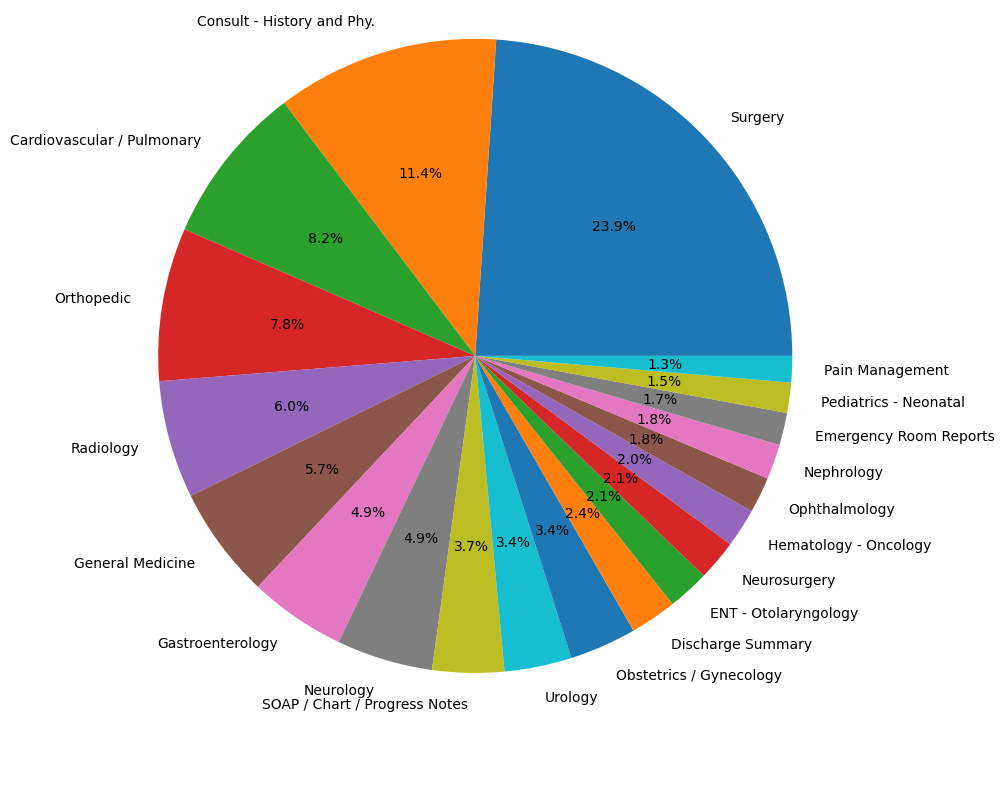

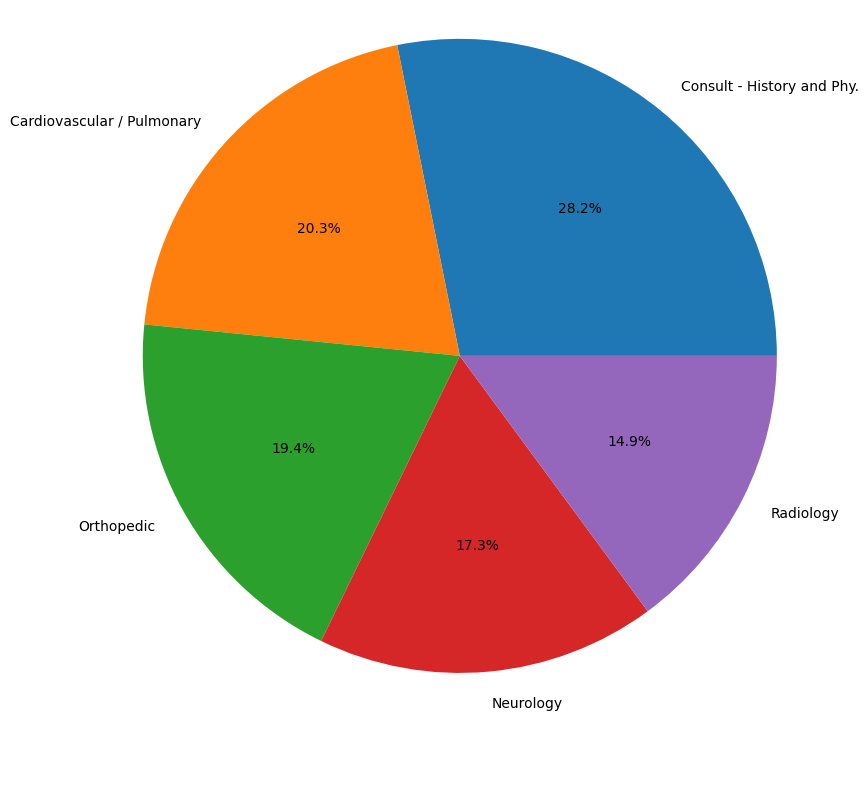

In [ ]:
cause_dist = df['medical_specialty'].value_counts()[0:20]
print(cause_dist)
plt.figure(figsize=(9,9))
plt.title(' ', y=-0.15)
plt.pie(cause_dist, labels=list(cause_dist.index),autopct="%.1f%%")
plt.axis('equal')
# выбранные категории
cause_dist = data['medical_specialty'].value_counts()[0:top_categories_num]
print(cause_dist)
plt.figure(figsize=(9,9))
plt.title(' ', y=-0.15)
plt.pie(cause_dist, labels=list(cause_dist.index),
autopct="%.1f%%")
plt.axis('equal')

In [ ]:
train_text, temp_text, train_labels, temp_labels = sklearn.model_selection.train_test_split(data['description'],
                                       data['labels'], random_state=42, test_size=0.3, stratify=data['labels'])

val_text, test_text, val_labels, test_labels = sklearn.model_selection.train_test_split(temp_text, temp_labels,
                                                            random_state=42,test_size=0.5, stratify=temp_labels)

unseen_train_text, unseen_test_text, unseen_train_labels,unseen_test_labels = sklearn.model_selection.train_test_split(test_unseen_categories['description'],
                                                                                                            test_unseen_categories['labels'], random_state=42,
                                                                                                      test_size=0.2, stratify=test_unseen_categories['labels'])

In [ ]:
MAX_SENTENCE_LENGTh = 70 
# Load the BERT tokenizer
model_name = 'microsoft/BiomedNLP-PubMedBERT-base-uncased-abstract-fulltext' #('bert-base-uncased')   'microsoft/BiomedNLP-PubMedBERT-base-uncased-abstract-fulltext'
tokenizer = BertTokenizerFast.from_pretrained(model_name) 

# Longformer toknizer
#model_name = "allenai/longformer-base-4096" 
#tokenizer = AutoTokenizer.from_pretrained(model_name)

# tokenize and encode sequences in the sets set
texts = [train_text, val_text, test_text, unseen_train_text, unseen_test_text]
tokens_texts = []

for text in texts:
    tokens_texts.append(tokenizer.batch_encode_plus(text.tolist(),max_length = MAX_SENTENCE_LENGTh, padding='max_length', truncation=True))

train_tokinized, val_tokinized, test_tokinized, unseen_train_tokinized, unseen_test_tokinized = tokens_texts

In [ ]:
def convert_to_tensors(data, labels):
  
    seq = torch.tensor(data['input_ids'])
    mask = torch.tensor(data['attention_mask'])
    y = torch.tensor(labels.tolist())

    return seq, mask, y

train_seq, train_mask, train_y  = convert_to_tensors(train_tokinized, train_labels)
val_seq, val_mask, val_y  = convert_to_tensors(val_tokinized, val_labels)
test_seq, test_mask, test_y  = convert_to_tensors(test_tokinized, test_labels)

unseen_train_seq, unseen_train_mask, unseen_train_y  = convert_to_tensors(unseen_train_tokinized, unseen_train_labels)
unseen_test_seq, unseen_test_mask, unseen_test_y  = convert_to_tensors(unseen_test_tokinized, unseen_test_labels)
     

In [ ]:

class ContrastiveDataset(Dataset):

    def __init__(self, train_seq, train_mask, train_y, positive_prob=0.5):

        super().__init__()
        self.train_seq = train_seq
        self.train_mask = train_mask
        self.train_y = train_y
        self.positive_prob = positive_prob # probability to sample two texts with the same category
        
        self.hash_table = {} # format: {"category" : [i1, i2, ...]}

        # construct a hash table, each key is a category
        # and the value is a list of the indexs of the texts which belong to this category 
        for i in range(len(self.train_seq)):
            label = self.train_y[i].item()
            if label in self.hash_table:
                self.hash_table[label].append(i)
            else:
                self.hash_table[label] = [i]
        

    def __getitem__(self, index):
        """
        Sample two texts from the same category with probability self.positive_prob
        :param index: index (int)
        :return:  seq_0 - a sequence of IDs (each ID represent a word in the vocabulary)
                  seq_1 - a sequence which differnt from seq0 (different text)
                  mask_0 - attention mask for seq1
                  mask_1 - attention mask for seq1
                  same_class - 1 if seq0 and seq1 are both from the same category, 0 otherwise
        """
        same_class = random.uniform(0, 1)
        same_class = same_class > self.positive_prob

        seq_0 = self.train_seq[index]
        mask_0 = self.train_mask[index]
        label_0 = self.train_y[index].item()
        class_samples = self.hash_table[label_0]

        if len(class_samples) < 2: # handle the case where there are only a single text in some category (in this case we can't draw another text from this category...)
            same_class = False

        if same_class:
            while True:                    
                rnd_idx = random.randint(0, len(class_samples) - 1)
                index_1 = class_samples[rnd_idx]
                if index_1 != index:
                    seq_1 = self.train_seq[index_1]
                    mask_1 = self.train_mask[index_1]
                    label_1 = self.train_y[index_1].item()
                    break
        else:
            while True:
                index_1 = random.randint(0, self.__len__() - 1)
                if index_1 != index:
                    seq_1 = self.train_seq[index_1]
                    mask_1 = self.train_mask[index_1]
                    label_1 = self.train_y[index_1].item()
                    if label_1 !=  label_0:
                        break

        return seq_0, seq_1, mask_0, mask_1, torch.tensor(same_class, dtype=torch.float)

    def __len__(self):
        return len(self.train_seq)

class SimpleDataset(Dataset):

    def __init__(self, seq, mask, y, positive_prob=0.5):

        super().__init__()
        self.seq = seq
        self.mask = mask
        self.y = y


    def __getitem__(self, index):
        """
        Sample texts by the order of the training set.
        :param index: index (int)
        :return: seq - a sequence of IDs (each ID represent a word in the vocabulary)
                 mask - attention mask for seq
                 y - the category of this text
                        
        """
        return   self.seq[index], self.mask[index], torch.tensor(self.y[index].item())

    def __len__(self):
        return len(self.seq)

In [ ]:
train_set = ContrastiveDataset(train_seq, train_mask,  train_y)
val_set = ContrastiveDataset(val_seq, val_mask, val_y)
test_set = ContrastiveDataset(test_seq, test_mask,test_y)

train_set_simple = SimpleDataset(train_seq, train_mask,  train_y)
test_set_simple = SimpleDataset(test_seq, test_mask,  test_y)
unseen_train_set_simple = SimpleDataset(unseen_train_seq, unseen_train_mask,  unseen_train_y)
unseen_test_set_simple = SimpleDataset(unseen_test_seq, unseen_test_mask,  unseen_test_y)
     

In [ ]:
trainLoader = DataLoader(train_set, batch_size=32, shuffle=True,  drop_last=False, num_workers=0)
valLoader = DataLoader(val_set, batch_size=32, shuffle=True,  drop_last=False, num_workers=0)
testLoader = DataLoader(test_set, batch_size=10, shuffle=False,  drop_last=False, num_workers=0)

trainLoader_simple = DataLoader(train_set_simple, batch_size=32, shuffle=False,  drop_last=False, num_workers=0)
testLoader_simple = DataLoader(test_set_simple, batch_size=64, shuffle=False,  drop_last=False, num_workers=0)
unseen_trainLoader_simple = DataLoader(unseen_train_set_simple, batch_size=64, shuffle=False,  drop_last=False, num_workers=0)
unseen_testLoader_simple = DataLoader(unseen_test_set_simple, batch_size=64, shuffle=False,  drop_last=False, num_workers=0)
     

## **Siamese Transformer Network**

In [ ]:
class BERT_Arch(nn.Module):

    def __init__(self, bert):
      
      super(BERT_Arch, self).__init__()

      self.bert = bert 

      # For cls_hs output (First token embedding)

      #self.fc1 = nn.Linear(768,512)
      #self.dropout = nn.Dropout(0.1)
      #self.relu =  nn.ReLU()
      #self.fc2 = nn.Linear(512,128)

      # For hs output (all tokens embeddings)
      # https://chriskhanhtran.github.io/posts/cnn-sentence-classification/
      self.conv1 = nn.Conv1d(in_channels=768, out_channels=128, kernel_size=3, stride=1) # kernal_size=3 == three-grams
      self.avg_pooling = nn.AvgPool1d(kernel_size=2)                                        
      self.conv2 = nn.Conv1d(in_channels=128, out_channels=64, kernel_size=3, stride=1) 
      self.flatten = nn.Flatten()                                                          
      self.fc = nn.Linear(64,128)                                                    
      self.dropout = nn.Dropout(0.2)

      # Other options:
      #Mean of the token embeddings
      #Max of the token embedding
      
    def forward(self, seq, mask):
      
      # Explaination on BERT and its outputs:
      # https://towardsdatascience.com/tips-and-tricks-for-your-bert-based-applications-359c6b697f8e
      # To sum up: BERT is a transformer encoder, meanning it produces representations of the inputs, and hence we can use it for several tasks.

      # BERT returns a dictionary of vectors where the first is called 'sequence output' (or 'hidden state'=hs) and the other is 'pooled output' (or 'cls_hs').
      # ** 'sequence_output' is of shape [batch_size, max_seq_length, 768] with representations for each input token (including start symbol and end symbol)
      # ** 'pooled_output' is of shape [batch_size, 768] with representations for the entire input sequences. It created by taking only the first token embedded vector (start symbol)
      #     (and pass it throgh more layers (?))
      
      # The idea of "pooled_output":
      # Since, the embeddings from the BERT model at the output layer are known to be contextual embeddings, the output of the 1st token, i.e, [CLS] token
      # would have captured sufficient context. Hence, the authors of BERT paper found it sufficient to use only the output from the 1st token for few tasks
      # such as classification. They call this output from the single token (i.e, 1st token) as pooled_output.

      # Get embeddings from bert. 
      # Output shape: hs = (b, max_len_seq, embed_dim)           
      #               cls = (b, embed_dim)
      # where:  b: batch_size
      #         max_len_seq=number of tokens in the longest text (we defined it erilier)
      hs, cls_hs = self.bert(seq, attention_mask=mask, return_dict=False) 
   
      #x = self.fc1(cls_hs)
      #x = self.dropout(x)
      #x = self.relu(x) 
      #x = self.fc2(x) 

     
      x = hs.permute(0, 2, 1).contiguous()          # Permute `hs` to match input shape requirement of `nn.Conv1d`
                                                    # The contiguous() ensures the memory of the tensor is stored contiguously
                                                    # which helps avoid potential issues during processing.
                                                    # Output shape: (b, 768, 70) = (b, embed_dim, max_len_seq).        
      
      x = F.relu(self.conv1(x))                     # Output shape: (b, 128, *)  * depends on kernel size and padding
      x = self.avg_pooling(x)                       # Output shape: (b, 128, *)
      x = F.relu(self.conv2(x))                     # Output shape: (b, 128, *)
      x = F.max_pool1d(x, kernel_size=x.shape[2])   # Output shape: (b, 128, 1) # trick: we use kernel of size x.shape[2] to reduce from * to 1
      x = self.flatten(x)                           # Output shape: (b, 128)
      x = self.fc(x)                                # Output shape: (b, 128)
      x = self.dropout(x) 
    
      return x


class SiameseNeuralNetwork(nn.Module):
    
    def __init__(self, bert_arch):
        super().__init__()            # TODO super?

        self.bert_arch = bert_arch
        self.distance_layer = nn.Sequential(nn.Linear(128, 1), nn.Sigmoid())  # if we would use BCEWithLogitsLoss as loss function, we should delte the sigmoid since we dont need it after the linear layer a sigmoid layer                                  


    def forward(self, seq1, seq2, mask1, mask2):
        feature_vec1 = self.bert_arch(seq1, mask1) # feature_vec1 shape:  [batch_size, embedding_size]
        feature_vec2 = self.bert_arch(seq2, mask2)
        difference = torch.abs(feature_vec1 - feature_vec2)  
        out = self.distance_layer(difference)
        return out #feature_vec1, feature_vec2#out


class ContrastiveLoss(nn.Module):
    """
    Takes embeddings of two samples and a target label == 1 if samples are from the same class and label == 0 otherwise
    """

    def __init__(self, margin):
        super(ContrastiveLoss, self).__init__()
        self.margin = margin
        self.eps = 1e-9

    def forward(self, output1, output2, target, size_average=True):
        distances = (output2 - output1).pow(2).sum(1)  # squared distances
        losses = 0.5 * (target.float() * distances +
                        (1 + -1 * target).float() *  torch.nn.functional.relu(self.margin - (distances + self.eps).sqrt()).pow(2))
        return losses.mean() if size_average else losses.sum()


In [ ]:
def train_siamese_network(model, dataloaders, num_epochs, device): 
    """
    Train the given SNN model.

    :param model: SNN model
    :param dataloaders: a dict that contains train data loader and validation data loader
    :param num_epochs: number of epochs
    :param device: 'cpu' or 'cuda' 

    :return:  train_loss_history - list of train losses by epochs
              val_loss_history -  list of validation losses by epochs

    """
    train_loss_history = []
    val_loss_history = []
    matching_similarity = []
    non_matching_similarity = []

    val_matching_similarity = []
    val_non_matching_similarity = []

    criterion = torch.nn.BCELoss(reduction='mean') #ContrastiveLoss(margin=1)  #losses.ContrastiveLoss(pos_margin=0, neg_margin=1) # torch.nn.BCEWithLogitsLoss(reduction='mean') # the labels are same class (1) vs. different class (0)
    learning_rate = 0.005 # 0.005 # 0.1
    optimizer  =  AdamW(model.parameters(),lr =learning_rate)#torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)  # AdamW(model.parameters(),lr =learning_rate)  1e-5
    
    # lr = lr * factor 
    # mode='min': look for the min validation loss to track
    # patience: number of epochs - 1 where loss plateaus before decreasing LR
    # patience = 0, after 1 bad epoch, reduce LR
    # factor: decaying factor

    #scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=1, verbose=True, min_lr=0.0001)  ########################################################
    #cyclic_scheduler = torch.optim.lr_scheduler.CyclicLR(optimizer, base_lr=0.0001, max_lr=0.1, cycle_momentum=False) ########################################################

    for epoch in range(num_epochs):  # loop over the train dataset multiple times

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
  
            if phase == 'train':
                model.train() 
            else:
                model.eval()   

            running_loss = 0.0

            for i, batch in enumerate(dataloaders[phase]):

                  seq1, seq2, mask1, mask2, label = batch

                  if device == 'cuda':
                    seq1, seq2, mask1, mask2, label = seq1.to(device), seq2.to(device), mask1.to(device), mask2.to(device), label.to(device)

                  # zero the parameter gradients
                  optimizer.zero_grad()
                  
                  # track history  only in train
                  with torch.set_grad_enabled(phase == 'train'):

                      # forward 
                      output = model.forward(seq1, seq2, mask1, mask2) 
                      loss = criterion(output, label.view(output.size())) # criterion(output.squeeze(0), label.view(1))    label.view((trainLoader.batch_size,1))
                      
                      # backward + optimize only if in training phase
                      if phase == 'train': #  with torch.no_grad() if phae == 'val'?
                          loss.backward()
                          torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0) # clip the the gradients to 1.0. It helps in preventing the exploding gradient problem
                          optimizer.step()
                          #cyclic_scheduler.step() ########################################################

                          # save similarity scores for training data
                          output = output.cpu().detach().numpy()
                          label = label.cpu().numpy()
                          non_matching_similarity.append((sum(output[label == 0]) / sum(label == 0)).item())
                          matching_similarity.append((sum(output[label == 1]) / sum(label == 1)).item())
                     
                      if phase == 'val':
                         val_non_matching_similarity.append((sum(output[label == 0]) / sum(label == 0)).item())
                         val_matching_similarity.append((sum(output[label == 1]) / sum(label == 1)).item())

                  running_loss += loss.item() * seq1.size(0)  #we multiply by the batch size (note that the batch size in the last batch may not be the batch size we did since the batch size dont necceraly divide the train size)

            epoch_loss = running_loss / len(dataloaders[phase].dataset)
            if phase == 'train':
               train_loss_history.append(epoch_loss) 
            else:
               val_loss_history.append(epoch_loss)
               #scheduler.step(epoch_loss) ########################################################

            print('Epoch {} | {} loss: {:.3f}'.format(epoch, phase, epoch_loss))
            
                  
    return train_loss_history, val_loss_history, [non_matching_similarity, matching_similarity, val_non_matching_similarity, val_matching_similarity]

    

In [ ]:
# specify GPU
# Get cpu or gpu device for training.
device = "cuda" if torch.cuda.is_available() else "cpu"
print("Using {} device".format(device))

# import BERT-base pretrained model
bert = AutoModel.from_pretrained(model_name)   # ('bert-base-uncased') 'microsoft/BiomedNLP-PubMedBERT-base-uncased-abstract-fulltext'

# freeze all the parameters
for param in bert.parameters():
    param.requires_grad = False

# pass the pre-trained BERT to our define architecture
bert_arch = BERT_Arch(bert)

SNN_model = SiameseNeuralNetwork(bert_arch).to(device)
num_epochs = 30

train_loss_history, val_loss_history, similarities_list = train_siamese_network(SNN_model, dataloaders={"train":trainLoader, "val":valLoader},  num_epochs=num_epochs, device=device)

non_matching_similarity, matching_similarity, val_non_matching_similarity, val_matching_similarity = similarities_list

Using cuda device


Some weights of the model checkpoint at microsoft/BiomedNLP-PubMedBERT-base-uncased-abstract-fulltext were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.decoder.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Epoch 0 | train loss: 0.694
Epoch 0 | val loss: 0.687
Epoch 1 | train loss: 0.663
Epoch 1 | val loss: 0.706
Epoch 2 | train loss: 0.652
Epoch 2 | val loss: 0.649


<ipython-input-27-f8a5afc89fcb>:74: RuntimeWarning: invalid value encountered in long_scalars
  non_matching_similarity.append((sum(output[label == 0]) / sum(label == 0)).item())


Epoch 3 | train loss: 0.644
Epoch 3 | val loss: 0.668
Epoch 4 | train loss: 0.611
Epoch 4 | val loss: 0.679


<ipython-input-27-f8a5afc89fcb>:75: RuntimeWarning: invalid value encountered in long_scalars
  matching_similarity.append((sum(output[label == 1]) / sum(label == 1)).item())


Epoch 5 | train loss: 0.681
Epoch 5 | val loss: 0.642
Epoch 6 | train loss: 0.628
Epoch 6 | val loss: 0.678
Epoch 7 | train loss: 0.642
Epoch 7 | val loss: 0.660
Epoch 8 | train loss: 0.633
Epoch 8 | val loss: 0.673
Epoch 9 | train loss: 0.638
Epoch 9 | val loss: 0.677
Epoch 10 | train loss: 0.634
Epoch 10 | val loss: 0.580
Epoch 11 | train loss: 0.629
Epoch 11 | val loss: 0.625
Epoch 12 | train loss: 0.613
Epoch 12 | val loss: 0.669
Epoch 13 | train loss: 0.618
Epoch 13 | val loss: 0.610
Epoch 14 | train loss: 0.601
Epoch 14 | val loss: 0.752
Epoch 15 | train loss: 0.630
Epoch 15 | val loss: 0.625
Epoch 16 | train loss: 0.630
Epoch 16 | val loss: 0.637
Epoch 17 | train loss: 0.602
Epoch 17 | val loss: 0.665
Epoch 18 | train loss: 0.606
Epoch 18 | val loss: 0.669
Epoch 19 | train loss: 0.607
Epoch 19 | val loss: 0.660
Epoch 20 | train loss: 0.626
Epoch 20 | val loss: 0.645
Epoch 21 | train loss: 0.603
Epoch 21 | val loss: 0.650
Epoch 22 | train loss: 0.624
Epoch 22 | val loss: 0.664
Ep

In [ ]:
def plot_losses(train_loss_histoыry, val_loss_history, num_epochs):
    
    fig = go.Figure()

    line_color = [px.colors.qualitative.Light24[5], px.colors.qualitative.Light24[4]] 


    fig.add_trace(go.Scatter(x=list(range(1, num_epochs+1)), y=train_loss_history, mode='lines', line=dict(color=line_color[0], width=1), name="train loss"))
    fig.add_trace(go.Scatter(x=list(range(1, num_epochs+1)), y=val_loss_history, mode='lines',line=dict(color=line_color[1], width=1), name="valdiation loss")) #opacity=0.8

    fig.update_yaxes(range=[0, 1])
    fig.update_traces(textposition='top center')
    fig.update_layout(autosize=False,width=900, height=500, title_text="SNN Loss", title_x=0.5, xaxis_title="Epoch", yaxis_title="", xaxis = dict(tickmode='linear', tick0=1, dtick=1), legend=dict(yanchor="top",xanchor="right", x=1.35, y=1),template="plotly_dark")
    fig.show()

In [ ]:
plot_losses(train_loss_history, val_loss_history, num_epochs)

In [ ]:
def plot_similarity_scores(non_matching_similarity, matching_similarity):

    train_num_batchs = len(non_matching_similarity)
    
    fig = go.Figure()

    line_color = [px.colors.qualitative.Light24[22], px.colors.qualitative.Light24[19]] 


    fig.add_trace(go.Scatter(x=list(range(1, train_num_batchs+1)), y=non_matching_similarity, mode='lines', line=dict(color=line_color[0], width=1), name="unmatching categories"))
    fig.add_trace(go.Scatter(x=list(range(1, train_num_batchs+1)), y=matching_similarity, mode='lines',line=dict(color=line_color[1], width=1), name="matching categories")) #opacity=0.8

    fig.update_yaxes(range=[0, 1])
    fig.update_traces(textposition='top center')
    fig.update_layout(autosize=False,width=900, height=500, title_text="Similarity Scores", title_x=0.5, xaxis_title="Batch", yaxis_title="", legend=dict(yanchor="top",xanchor="right", x=1.35, y=1),template="plotly_dark")
    fig.show()
     

In [ ]:
plot_similarity_scores(non_matching_similarity, matching_similarity)

In [ ]:
plot_similarity_scores(val_non_matching_similarity, val_matching_similarity)

In [ ]:
# print all layers in the model that are participating in the learning process
for name, param in SNN_model.named_parameters():
    if param.requires_grad:
        print(name)

bert_arch.conv1.weight
bert_arch.conv1.bias
bert_arch.conv2.weight
bert_arch.conv2.bias
bert_arch.fc.weight
bert_arch.fc.bias
distance_layer.0.weight
distance_layer.0.bias


In [ ]:
def construct_train_matrix(SNN_model, trainLoader_simple):
    """
    Embed the training data using the trained SNN model.
    """

    # Get intermidate layer output.
    # Source: https://discuss.pytorch.org/t/how-can-i-extract-intermediate-layer-output-from-loaded-cnn-model/77301/2
    activation = {}
    def get_activation(name):
        def hook(model, input, output):
            activation[name] = output.detach()
        return hook

    # SNN_model.bert_arch.fc1.register_forward_hook(get_activation('fc1'))
    SNN_model.bert_arch.fc.register_forward_hook(get_activation('fc'))

    train_matrix = []
    print("num batches:", len(trainLoader_simple))
    with torch.no_grad():            
        for i, batch in enumerate(trainLoader_simple):
            print(i, "/", len(trainLoader_simple), " batches")
            seq1, mask1, label1 = batch
            if device == 'cuda':
                seq1, mask1, label1 = seq1.to(device), mask1.to(device), label1.to(device)

            SNN_model.eval()
            output = SNN_model(seq1, seq1, mask1, mask1)
            train_matrix.append(activation['fc'].cpu().numpy()) # activation['fc1'] return a tensor in cuda with size (batch_size, embedding_dim), so we move it to cpu, than to numpy array.

    return np.vstack(train_matrix) # we combine all the batches, so now we return matrix of size (num_samples_train, embedding_dim)

def extract_prototypes(k, SNN_model, trainLoader_simple, train_labels, train_matrix):
    """
    Compute kc (= k/num_classes_train) prototypes for each class in the trainset.
    (if k % num_classes_train != 0 then take the highest k0 <= k which is divisable by num_classes_train)

    :param k: 
    :param train_matrix: size (num_samples_train, embedding_dim)
    :return: 
    """
    train_labels = list(train_labels)
    train_dataset = trainLoader_simple.dataset  # contains triples of (seq, mask, label)

    # construct a hash table, each key is a class of diagnosis
    # and the value is a list of the indexs of the sentences which belong to this class 
    hash_table = {} # format: {"diagnosis" : [i1, i2, ...]}
    for i in range(len(train_labels)):
        lbl = train_labels[i]
        if lbl in hash_table:
            hash_table[lbl].append(i)
        else:
            hash_table[lbl] = [i]


    # Create prototypess
    prototypes_list = {diagnosis:[] for diagnosis in hash_table.keys()}
    num_classes_train = len(hash_table)
    assert k >= num_classes_train, "k should be greater than the numbrer of uniqe labels in the train set'"
    kc = int(k / num_classes_train)
    print("kc:", kc)

    for diagnosis in hash_table.keys():

      print("diagnosis:", diagnosis)

      if len(hash_table[diagnosis]) <= 1 : # if there is only a single sentence in some diagnosis sentences list - take it as the prototype of this class
          prototypes_list += list(train_matrix[hash_table[diagnosis]])
          
      else:
          # fit on all sentences which belongs to the same class (diagnosis)
          kmeans = KMeans(n_clusters=kc, init='k-means++').fit(train_matrix[hash_table[diagnosis]]) 
          # extract for each centroid the closest real sample, and add it as a prototype
          for centroid in kmeans.cluster_centers_:
             #print(train_matrix[hash_table[diagnosis]].shape)
             best_match_index = None
             best_match_dist = float('inf')
             for sentence_index in hash_table[diagnosis]:
                 #print(sentence_index)
                 embedded_sent = train_matrix[sentence_index]
                 dist = distance.euclidean(centroid, embedded_sent)
                 #print("dist:", best_match_dist)
                 if dist < best_match_dist:
                    best_match_dist = dist
                    best_match_index = sentence_index
             #print(best_match_index)
             prototypes_list[diagnosis].append(train_dataset[best_match_index])
    
    return prototypes_list


     

In [ ]:
train_matrix = construct_train_matrix(SNN_model, trainLoader_simple)

num batches: 41
0 / 41  batches
1 / 41  batches
2 / 41  batches
3 / 41  batches
4 / 41  batches
5 / 41  batches
6 / 41  batches
7 / 41  batches
8 / 41  batches
9 / 41  batches
10 / 41  batches
11 / 41  batches
12 / 41  batches
13 / 41  batches
14 / 41  batches
15 / 41  batches
16 / 41  batches
17 / 41  batches
18 / 41  batches
19 / 41  batches
20 / 41  batches
21 / 41  batches
22 / 41  batches
23 / 41  batches
24 / 41  batches
25 / 41  batches
26 / 41  batches
27 / 41  batches
28 / 41  batches
29 / 41  batches
30 / 41  batches
31 / 41  batches
32 / 41  batches
33 / 41  batches
34 / 41  batches
35 / 41  batches
36 / 41  batches
37 / 41  batches
38 / 41  batches
39 / 41  batches
40 / 41  batches


In [ ]:
prototypes_list = extract_prototypes(100, SNN_model, trainLoader_simple, train_labels, train_matrix)

kc: 20
diagnosis: 5


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



diagnosis: 19


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



diagnosis: 22


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



diagnosis: 3


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



diagnosis: 27


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [ ]:
from sklearn.decomposition import PCA
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.manifold import Isomap
from sklearn.manifold import TSNE
from sklearn.manifold import SpectralEmbedding

def show_space(X, title, colors=None, color_by="", show_3D=False):

  if show_3D:
    dictionary = dict(zip(pd.DataFrame(X).columns, ["COMP1", "COMP2", "COMP3"]))
    temp_df = pd.DataFrame(X).rename(columns=dictionary)
    fig = px.scatter_3d(temp_df, x='COMP1', y='COMP2', z='COMP3',color=colors, template="plotly_dark", labels={"color": color_by})
  else:
    dictionary = dict(zip(X.columns, ["COMP1", "COMP2"]))
    temp_df = pd.DataFrame(X).rename(columns=dictionary)
    fig = px.scatter(temp_df, x='COMP1', y='COMP2',color=colors, template="plotly_dark", labels={"color": color_by})

  fig.update_traces(marker=dict(size=4, opacity=0.98), textposition='top center')
  fig.update_layout(title_text=title, title_x=0.5, autosize=False,width=900, height=500, legend=dict(yanchor="top",xanchor="right", x=1.1, y=1))
  fig.show()
  #fig.write_html("file.html")

In [ ]:
  fig.update_traces(marker=dict(size=4, opacity=0.98), textposition='top center')
  fig.update_layout(title_text=title, title_x=0.5, autosize=False,width=900, height=500, legend=dict(yanchor="top",xanchor="right", x=1.1, y=1))
  fig.show()

NameError: ignored

In [ ]:
print("Explained variance per component:", pca_alg.explained_variance_ratio_)
print("Comulative explained variance:", pca_alg.explained_variance_ratio_.cumsum())

Explained variance per component: [0.8393369  0.08917788 0.05800308]
Comulative explained variance: [0.8393369 0.9285147 0.9865178]


In [ ]:
def project_to_dissimilarity_space(dataLoader, SNN_model, prototypes_list):
    """
    
    Parameters
    ----------
    dataLoader : 
    SNN_model : 

    
    Returns
    -------
    projected_data : numpy array of shape (num_samples_data, projection_dim)
    """

    projected_data = [] 
    with torch.no_grad():     
               
        for batch in dataLoader:
            print("****new batch***")

            projected_sentence = []
            seq1, mask1, label1 = batch
            if device == 'cuda':
                seq1, mask1, label1 = seq1.to(device), mask1.to(device), label1.to(device)

            for diagnosis in prototypes_list:
                #print("diagnosis:", diagnosis)
                for centroid in prototypes_list[diagnosis]: # centroid contains a triple of (seq, mask, label)
                    seq2, mask2 = centroid[0].repeat(seq1.shape[0], 1), centroid[1].repeat(mask1.shape[0], 1)  # we stack to seq2 and mask2 replications of them such that they will fit the batch size of seq1 and mask2
                    if device == 'cuda':
                       seq2, mask2 = seq2.to(device), mask2.to(device)

                    SNN_model.eval()
                    distance = SNN_model(seq1, seq2, mask1, mask2)
                    projected_sentence.append(distance.squeeze().cpu().numpy())
            
            projected_data.append(np.array(projected_sentence).T)
            #break # TODO delete

    projected_data = np.vstack(projected_data)
    return projected_data
     

In [ ]:
projected_train = project_to_dissimilarity_space(trainLoader_simple, SNN_model, prototypes_list)

****new batch***
****new batch***
****new batch***
****new batch***
****new batch***
****new batch***
****new batch***
****new batch***
****new batch***
****new batch***
****new batch***
****new batch***
****new batch***
****new batch***
****new batch***
****new batch***
****new batch***
****new batch***
****new batch***
****new batch***
****new batch***
****new batch***
****new batch***
****new batch***
****new batch***
****new batch***
****new batch***
****new batch***
****new batch***
****new batch***
****new batch***
****new batch***
****new batch***
****new batch***
****new batch***
****new batch***
****new batch***
****new batch***
****new batch***
****new batch***
****new batch***


In [ ]:
projected_train.shape

(1282, 100)

In [ ]:
X_pca = pca_alg.fit_transform(projected_train) 
show_space(X_pca, title="3D Space", colors=pd.DataFrame(train_labels).replace(categories_mapping), color_by="category", show_3D=True)
print("Explained variance per component:", pca_alg.explained_variance_ratio_)
print("Comulative explained variance:", pca_alg.explained_variance_ratio_.cumsum())

ValueError: ignored

## **SVM**

In [ ]:
def ensemble_of_classifiers(projected_train,  train_y):
    """
    For each category a classifier is trained to discriminate between this category and all the other categories put together.
    
    Parameters
    ----------
    projected_train : shape (num_samples_train, projection_dim)
    train_y : shape (num_samples_train)

    
    Returns
    -------
    classifiers_list : a list of trained classifiers. The it'h classifier desined to predict the i'th category. 
    diagnosis_list : list of the categories order as the classifiers. 
    """

    classifiers_list = []

    diagnosis_list = np.sort(list(Counter(list(train_y)).keys()))   # orderd by increasing order: (0,1,2,..)

    for diagnosis in diagnosis_list:
        print(diagnosis)
        
        y = np.zeros(len(train_y))
        is_diagnosis = train_y == diagnosis
        y[is_diagnosis] = 1
        y = y.astype('int')
        if y.sum() == 0: # TODO delete
          continue
        classifier = SVC(gamma='auto', probability=True)
        classifier.fit(projected_train, y)

        classifiers_list.append(classifier)

    return classifiers_list, diagnosis_list



In [ ]:
classifiers, categories_order = ensemble_of_classifiers(projected_train,  train_labels)

3
5
19
22
27


In [ ]:
projected_test = project_to_dissimilarity_space(testLoader_simple, SNN_model, prototypes_list)

****new batch***
****new batch***
****new batch***
****new batch***
****new batch***


In [ ]:
projected_test.shape

(275, 100)

In [ ]:
def predict(projected_test, classifiers_list, categories_order, test_labels):

    pred_y = []
     
    for classifier in classifiers_list:
         pred_y.append(classifier.predict_proba(projected_test)[:,1])    # predict_proba returns probabiltiy for class==0 and for class==1, so we take only the probabilities of class==1
    
    pred_y = np.vstack(pred_y) # (num_classifiers, num_samples_test)
    highest_predictions = categories_order[np.argmax(pred_y, axis=0)]
    print(pred_y)
    print(highest_predictions)
    return highest_predictions
       

In [ ]:
preds = predict(projected_test, classifiers, categories_order, test_labels)

[[0.55412809 0.12188611 0.06046916 ... 0.06845216 0.02984782 0.70652429]
 [0.27523979 0.67597778 0.06601776 ... 0.75246135 0.11507002 0.17301166]
 [0.17339562 0.17294701 0.17348039 ... 0.17281626 0.17349725 0.17362696]
 [0.02346962 0.00744527 0.69490533 ... 0.0067358  0.06167605 0.03120048]
 [0.12099564 0.15009693 0.14894951 ... 0.13615704 0.17879266 0.1447731 ]]
[ 3  5 22 22  5  5  5  3  3  5  3 22  5 22  3 22 22 22 22 22 27  5 22 22
 27  5 22  5 22  5  5  5  3 22 22 22 27  5 27 27 22 22  3  3  5 19  5  5
 22  3 22 22 22 22  5 27  3 22  5  3 22  5  3 22  5  3  3  5  5 22  5  5
  5 22  5  5 22  5 22  5 27 22  5  3 22  5  3  3  5  3 22 22  5 22 27 22
  5  5  5 22 22  3  3  5  3 27  3  3 27 22 22 22  3  3  5  3 22 27 22 22
 22 22 19  3 27  3  5  5 22 22 19 22 19 22  5 22 22  5 27 22 22 22  5  5
 22  3  3  5 22  3 27  5  5 22  3 22 19  5  5 22  3 22 22  5 19 22  3  5
 22  5  3 22  5 19  5 22 22 22 27 27  3 27 19 22  3  5  3  3  5  5 22  5
  3 22  5 22  3 22  3  3 22 22  3  3  3 19 22 22 2

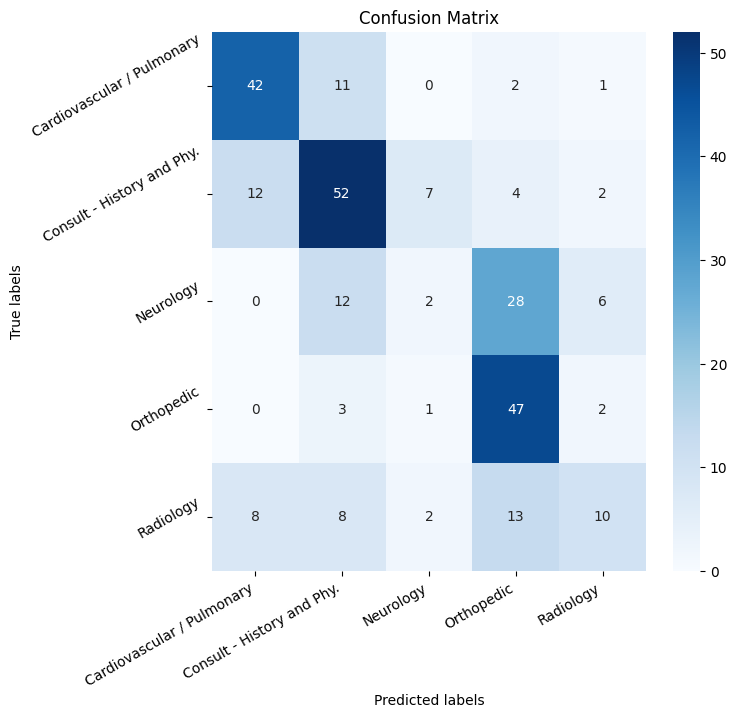

In [ ]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(mat,fig_size, labels):

    fig = plt.figure(figsize=(fig_size,fig_size))
    ax= fig.add_subplot(1,1,1)
    sns.heatmap(mat, annot=True, cmap="Blues",ax = ax,fmt='g'); #annot=True to annotate cells

    # labels, title and ticks
    ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);
    plt.setp(ax.get_yticklabels(), rotation=30, horizontalalignment='right')
    plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')     
    plt.show()

c_matrix = confusion_matrix(test_labels, preds)
plot_confusion_matrix(c_matrix, fig_size=7, labels=[categories_mapping[c] for c in categories_order])

In [ ]:
from sklearn.metrics import classification_report
categories_labels = [categories_mapping[c] for c in categories_order]
print(classification_report(test_labels, preds, target_names=categories_labels))

                            precision    recall  f1-score   support

Cardiovascular / Pulmonary       0.68      0.75      0.71        56
Consult - History and Phy.       0.60      0.68      0.64        77
                 Neurology       0.17      0.04      0.07        48
                Orthopedic       0.50      0.89      0.64        53
                 Radiology       0.48      0.24      0.32        41

                  accuracy                           0.56       275
                 macro avg       0.48      0.52      0.48       275
              weighted avg       0.50      0.56      0.51       275



In [ ]:
unseen_train_matrix = construct_train_matrix(SNN_model, unseen_trainLoader_simple)
unseen_prototypes_list = extract_prototypes(100, SNN_model, unseen_trainLoader_simple, unseen_train_labels, unseen_train_matrix)
unseen_projected_train = project_to_dissimilarity_space(unseen_trainLoader_simple, SNN_model, unseen_prototypes_list)
unseen_classifiers, unseen_categories_order = ensemble_of_classifiers(unseen_projected_train,  unseen_train_labels)
     

num batches: 15
0 / 15  batches
1 / 15  batches
2 / 15  batches
3 / 15  batches
4 / 15  batches
5 / 15  batches
6 / 15  batches
7 / 15  batches
8 / 15  batches
9 / 15  batches
10 / 15  batches
11 / 15  batches
12 / 15  batches
13 / 15  batches
14 / 15  batches
kc: 10
diagnosis: 12


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



diagnosis: 13


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



diagnosis: 20
diagnosis: 21


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



diagnosis: 10
diagnosis: 26
diagnosis: 23
diagnosis: 18


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



diagnosis: 32
diagnosis: 29


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



****new batch***
****new batch***
****new batch***
****new batch***
****new batch***
****new batch***
****new batch***
****new batch***
****new batch***
****new batch***
****new batch***
****new batch***
****new batch***
****new batch***
****new batch***
10
12
13
18
20
21
23
26
29
32


In [ ]:
unseen_projected_test = project_to_dissimilarity_space(unseen_testLoader_simple, SNN_model, unseen_prototypes_list)
unseen_preds = predict(unseen_projected_test, unseen_classifiers, unseen_categories_order, unseen_test_labels)


****new batch***
****new batch***
****new batch***
****new batch***
[[0.05976576 0.08480166 0.06817043 ... 0.11960378 0.0596422  0.06360604]
 [0.1668108  0.24154252 0.24547156 ... 0.21507987 0.19313146 0.14045149]
 [0.07162394 0.07770868 0.08179483 ... 0.08825247 0.08160561 0.06044457]
 ...
 [0.0808247  0.16161341 0.05756549 ... 0.03446571 0.05731738 0.0615855 ]
 [0.13580141 0.14740056 0.14274919 ... 0.13449728 0.14198893 0.13769931]
 [0.17005334 0.16207892 0.1419271  ... 0.14608442 0.13458027 0.16504233]]
[32 12 12 32 12 29 26 29 12 32 32 12 32 32 12 12 12 12 32 12 12 12 12 12
 12 12 26 12 12 12 12 12 32 12 12 26 12 12 12 12 26 12 12 12 32 12 12 32
 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 32 12 32 12 32 12 12 12 12
 26 12 12 32 12 32 12 32 32 12 26 12 12 32 12 12 32 32 12 12 12 12 12 12
 12 12 12 12 32 12 12 12 12 12 12 12 12 12 26 12 32 12 12 12 32 12 12 12
 12 12 12 32 12 32 32 12 12 12 12 12 12 12 12 12 12 32 12 26 32 12 12 32
 32 32 12 12 12 12 12 12 32 12 32 12 12 12 12 12 1

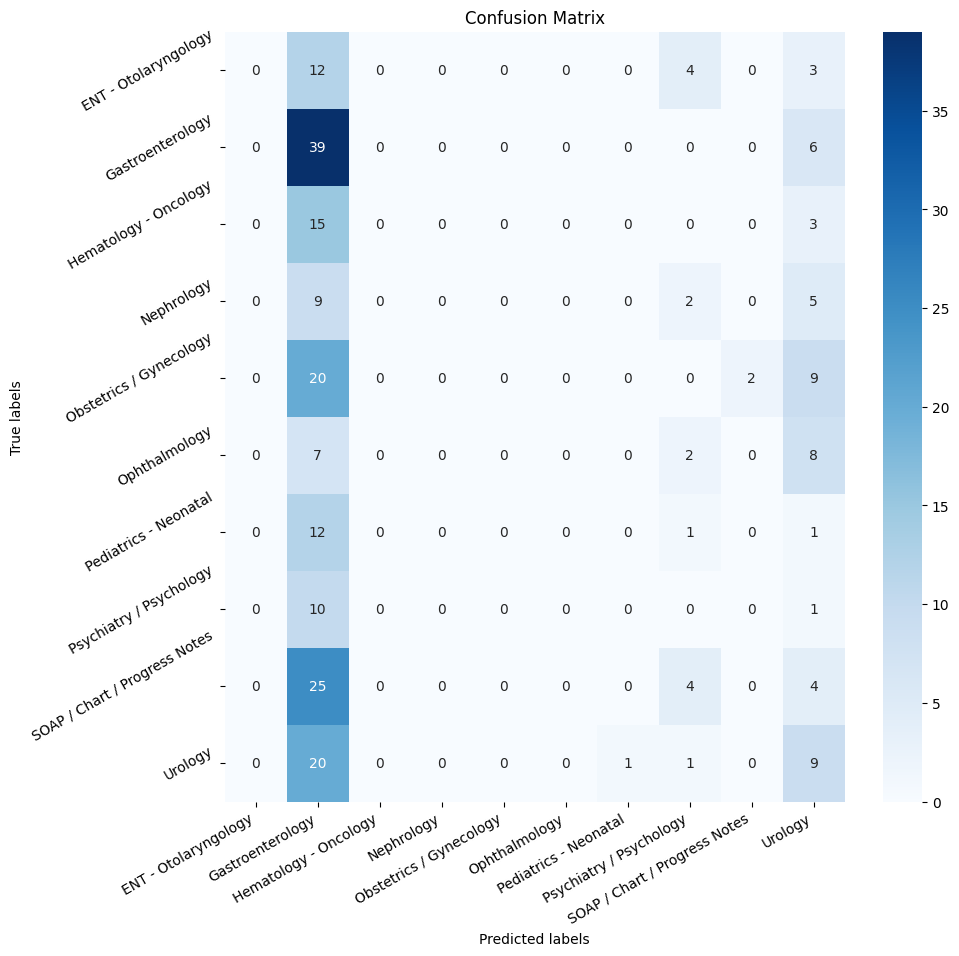

In [ ]:
unseen_c_matrix = confusion_matrix(unseen_test_labels, unseen_preds)
plot_confusion_matrix(unseen_c_matrix, fig_size=10, labels=[unseen_categories_mapping[c] for c in unseen_categories_order])

In [ ]:
Counter(unseen_train_labels)

Counter({12: 179,
         13: 72,
         20: 124,
         21: 66,
         10: 77,
         26: 42,
         23: 56,
         18: 65,
         32: 125,
         29: 133})

In [ ]:
unseen_categories_labels = [unseen_categories_mapping[c] for c in unseen_categories_order]
print(classification_report(unseen_test_labels, unseen_preds, target_names=unseen_categories_labels))

                               precision    recall  f1-score   support

         ENT - Otolaryngology       0.00      0.00      0.00        19
             Gastroenterology       0.23      0.87      0.36        45
        Hematology - Oncology       0.00      0.00      0.00        18
                   Nephrology       0.00      0.00      0.00        16
      Obstetrics / Gynecology       0.00      0.00      0.00        31
                Ophthalmology       0.00      0.00      0.00        17
        Pediatrics - Neonatal       0.00      0.00      0.00        14
      Psychiatry / Psychology       0.00      0.00      0.00        11
SOAP / Chart / Progress Notes       0.00      0.00      0.00        33
                      Urology       0.18      0.29      0.23        31

                     accuracy                           0.20       235
                    macro avg       0.04      0.12      0.06       235
                 weighted avg       0.07      0.20      0.10       235



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

